# Breast cancer Detection

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

## Loading the data 

In [46]:
df = pd.read_csv('Breast cancer dataset.csv')

In [47]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
print(df.shape)

(569, 33)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [29]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Data Preprocessing 

In [48]:
df.drop(['id','Unnamed: 32'],axis = 1, inplace = True)

In [49]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [50]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [51]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

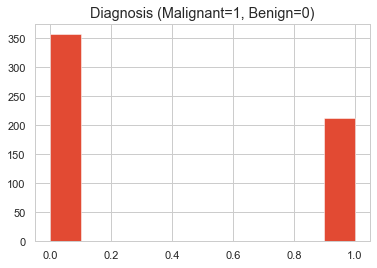

In [53]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (Malignant=1, Benign=0)')
plt.show()

## Exploratory Data Analysis 

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

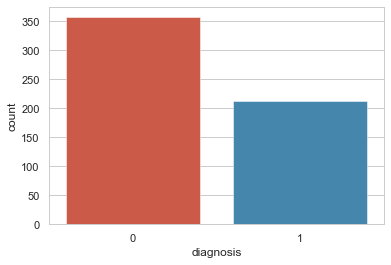

In [36]:
# Count plot of the target variable

sns.set_style('whitegrid')
sns.countplot(x='diagnosis', data=df)

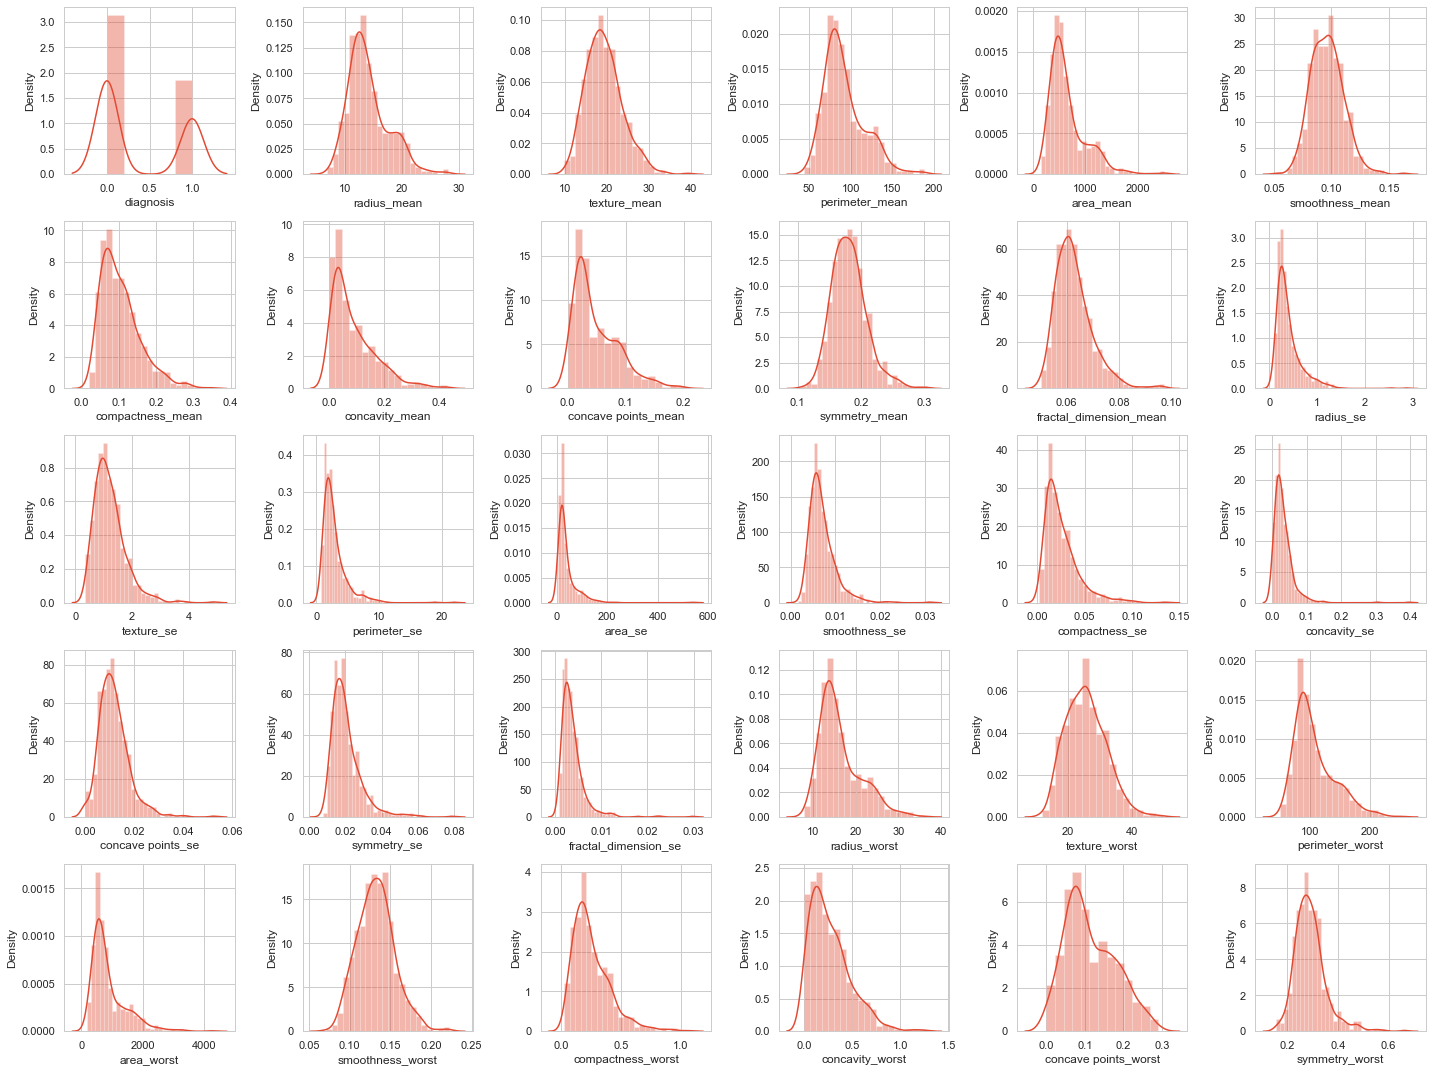

In [37]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

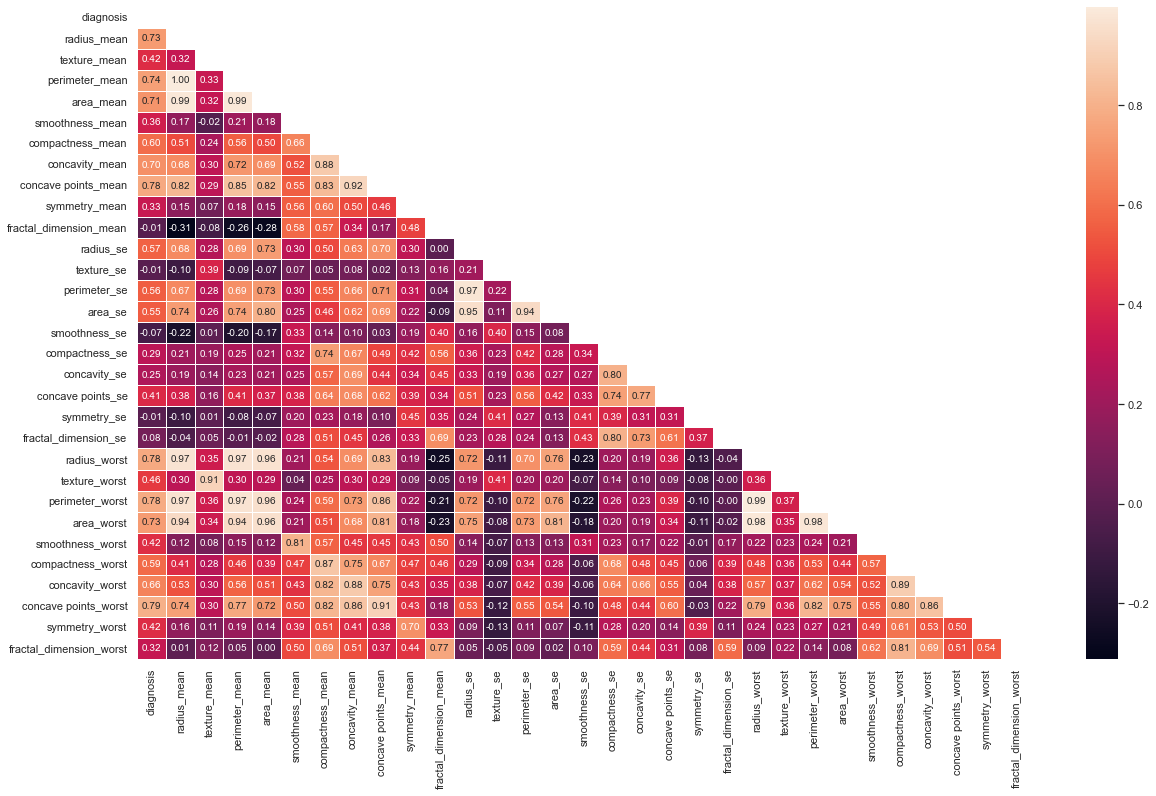

In [38]:
#heatmap
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [56]:
#removing the highly correlated features as it might lead to multi-collinearity
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 21 columns.


In [57]:
df.columns

Index(['diagnosis', 'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [58]:
df.shape

(569, 21)

In [19]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   smoothness_mean          569 non-null    float64
 2   compactness_mean         569 non-null    float64
 3   symmetry_mean            569 non-null    float64
 4   fractal_dimension_mean   569 non-null    float64
 5   texture_se               569 non-null    float64
 6   area_se                  569 non-null    float64
 7   smoothness_se            569 non-null    float64
 8   compactness_se           569 non-null    float64
 9   concavity_se             569 non-null    float64
 10  concave points_se        569 non-null    float64
 11  symmetry_se              569 non-null    float64
 12  fractal_dimension_se     569 non-null    float64
 13  texture_worst            569 non-null    float64
 14  area_worst               5

In [60]:
# creating the features and label
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

In [61]:
X.columns

Index(['smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [62]:
X.shape

(569, 20)

In [63]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [64]:
#scaling the data; scaling of the data makes it easy for a model to learn and understand the problem
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building 

### 1) Logistic Regression 

In [65]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [66]:
# model predictions

Y_pred = log_reg.predict(X_test)

In [67]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(Y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(Y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9874371859296482
0.9649122807017544


In [68]:
# confusion matrix

print(confusion_matrix(Y_test,Y_pred))

[[106   2]
 [  4  59]]


In [69]:
# classification report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### 2) K Neighbours Classifier 

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [71]:
# model predictions 

Y_pred = knn.predict(X_test)

In [72]:
# accuracy score

print(accuracy_score(Y_train, knn.predict(X_train)))

knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(knn_acc)

0.9522613065326633
0.935672514619883


In [73]:
# confusion matrix

print(confusion_matrix(Y_test, Y_pred))

[[104   4]
 [  7  56]]


In [74]:
# classification report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



### 3) Support Vector Machine (SVM)

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [76]:
#best parameters

grid_search.best_params_

{'C': 20, 'gamma': 0.01}

In [77]:
# best score
grid_search.best_score_

0.9799683544303799

In [78]:
svc = SVC(C = 10, gamma = 0.01, probability=True)
svc.fit(X_train, Y_train)

SVC(C=10, gamma=0.01, probability=True)

In [79]:
# model predictions 

Y_pred = svc.predict(X_test)

In [80]:
# accuracy score

print(accuracy_score(Y_train, svc.predict(X_train)))

svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(svc_acc)

0.9874371859296482
0.9707602339181286


In [81]:
# confusion matrix

print(confusion_matrix(Y_test, Y_pred))

[[106   2]
 [  3  60]]


In [82]:
# classification report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### 4) Decision Tree classifier 

In [83]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, Y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [84]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'splitter': 'random'}

In [85]:
# best score

grid_search_dt.best_score_

0.9648734177215189

In [86]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, min_samples_leaf= 4, min_samples_split= 6, splitter= 'random')
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [87]:
Y_pred = dtc.predict(X_test)

In [88]:
# accuracy score

print(accuracy_score(Y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))
print(dtc_acc)

0.9673366834170855
0.9239766081871345


In [89]:
# confusion matrix

print(confusion_matrix(Y_test, Y_pred))

[[103   5]
 [  8  55]]


<AxesSubplot:>

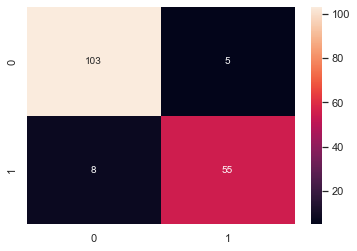

In [90]:
# heatmap for confusion matrix
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")

In [91]:
# classification report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



### 5) Random Forest Classifier 

In [92]:
from sklearn.ensemble import RandomForestClassifier

ran_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
ran_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [93]:
Y_pred = ran_clf.predict(X_test)

In [94]:
# accuracy score

print(accuracy_score(Y_train, ran_clf.predict(X_train)))

ran_clf_acc = accuracy_score(Y_test, Y_pred)
print(ran_clf_acc)

0.9974874371859297
0.9532163742690059


In [95]:
# confusion matrix
print(confusion_matrix(Y_test,Y_pred))

[[104   4]
 [  4  59]]


<AxesSubplot:>

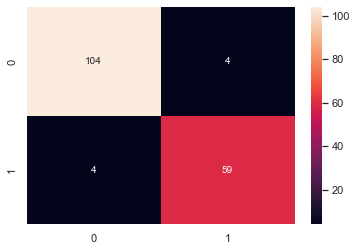

In [96]:
# heatmap for confusion matrix
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")

In [97]:
# classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Model comparison 

In [98]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,97.08
0,Logistic Regression,96.49
4,Random Forest Classifier,95.32
1,KNN,93.57
3,Decision Tree Classifier,92.40


In [99]:
import pickle
model = svc
pickle.dump(model, open("breast_cancer.pkl",'wb'))